# Combined Sentinel-1 and Sentinel-2 Temporal Statistical Analysis

In [1]:
import os
import yaml
from munch import munchify

### _Setup configuration and environment_

In [2]:
# define repo name and get root working directory
repo = 'statistical'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'fusion' )

In [3]:
# get pathname to configuration file
cfg_path = 'C:\\Users\\crwil\\Documents\\GitHub\\gedi\\l4a\\cfg\\sentinelhub'
cfg_file = os.path.join( cfg_path, 's1-s2-metrics.yml' )

In [4]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            datasource: "s1",
                            bands: [
                                "VV",
                                "VH",
                                "shadowMask",
                                "dataMask"
                            ]
                        },
                        {
                            datasource: "s2_l2a",
                            bands: [    "B02",
                                        "B03",
                                        "B04",
                                        "B05",
                                        "B06",
                                        "B07",
                                        "B08",
                                        "B8A",
                                        "B11",
                                        "B1

In [5]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )
config

Munch({'request': Munch({'evalscript': '//VERSION=3\nfunction setup() {\n    return {\n        input: [{\n            datasource: "s1",\n            bands: [\n                "VV",\n                "VH",\n                "shadowMask",\n                "dataMask"\n            ]\n        },\n        {\n            datasource: "s2_l2a",\n            bands: [    "B02",\n                        "B03",\n                        "B04",\n                        "B05",\n                        "B06",\n                        "B07",\n                        "B08",\n                        "B8A",\n                        "B11",\n                        "B12",\n                        "CLM",\n                        "viewZenithMean",\n                        "dataMask"\n            ],\n        } ],                        \n        output: [\n        {\n            id: "stats",\n            bands: [ "s1_vv", "s1_vh", "s1_rvi", "s2_ndvi", "s2_evi", "s2_gndvi", "s2_ndci", "s2_mcari" ],\n            sa

### _Replicate use case results taken from Sentinel-Hub documentation_

In [6]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2020-08-10', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-10-30', '%Y-%m-%d') }

In [7]:
# create instance of shclient class
from statisticalapi import Client
client = Client( config )

In [8]:
from sentinelhub import CRS

# define min and max latlons
# coords = 414315, 4958219, 414859, 4958819
# epsg = 32633

coords = 794801.3121695719, 9970630.68053934, 794861.3121695719, 9970690.68053934
epsg = 32736

crs = CRS( epsg )
bbox = client.getBoundingBox( coords, src_crs=crs )

In [9]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=10, bbox=bbox, interval='P1D' )

In [10]:
response._dfs[ 0 ]

,id,interval_from,interval_to,stats_s1_vv_min,stats_s1_vv_max,stats_s1_vv_mean,stats_s1_vv_stDev,stats_s1_vv_sampleCount,stats_s1_vv_noDataCount,stats_s1_vh_min,...,stats_s2_ndci_mean,stats_s2_ndci_stDev,stats_s2_ndci_sampleCount,stats_s2_ndci_noDataCount,stats_s2_mcari_min,stats_s2_mcari_max,stats_s2_mcari_mean,stats_s2_mcari_stDev,stats_s2_mcari_sampleCount,stats_s2_mcari_noDataCount
0,geom_0,2020-08-19,2020-08-20,0.066859,0.444549,0.195031,0.098463,36,0,0.018428,...,0.467263,0.031999,36,0,0.113677,0.193808,0.152609,0.022221,36,0
1,geom_0,2020-09-08,2020-09-09,0.057078,0.677958,0.270756,0.150598,36,0,0.018305,...,0.113640,0.019428,36,0,0.031924,0.080434,0.056579,0.009705,36,0
2,geom_0,2020-10-18,2020-10-19,0.114888,0.877831,0.302225,0.172874,36,0,0.014511,...,0.015650,0.010079,36,0,0.004267,0.097173,0.049087,0.024197,36,0


<AxesSubplot:xlabel='interval_from'>

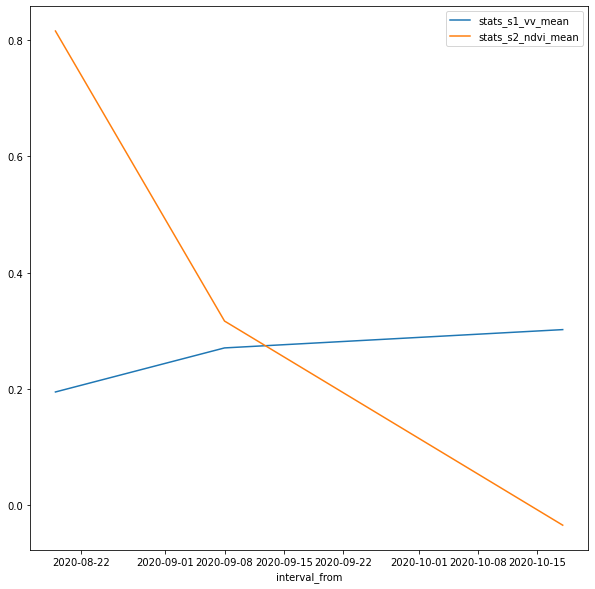

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,10) )
response._dfs[ 0 ].plot( ax=ax, x='interval_from', y='stats_s1_vv_mean' )
response._dfs[ 0 ].plot( ax=ax, x='interval_from', y='stats_s2_ndvi_mean' )